## 3주차 미션 소개 -  피처 엔지니어링(Feature Engineering)

* 피처 엔지니어링(Feature Engineering)은 머신러닝 모델을 훈련시키기 위해 입력 데이터로 사용되는 피처(또는 변수)들을 가공하거나 새로운 피처를 만들어내는 과정을 말합니다. 피처 엔지니어링은 머신러닝 성능을 향상시키고 모델의 일반화 성능을 향상시키는 데 핵심적인 역할을 합니다. 현실 세계의 데이터는 종종 불완전하고 노이즈가 많습니다. 결측값, 이상치, 오류 등이 있을 수 있습니다. 종속 변수와의 관계를 강화하고 모델이 더 나은 예측을 할 수 있도록 도와줍니다. 예를 들어, 특정 도메인 지식을 활용하여 새로운 피처를 생성하거나 기존 피처를 변형시켜 모델이 패턴을 더 잘 파악하도록 할 수 있습니다. 불필요한 피처를 제거하거나 피처를 효과적으로 변형함으로써 모델의 계산 효율성을 높일 수 있습니다. 이는 모델을 더 빠르게 훈련시키고 실행시킬 수 있습니다.

* 미션 데이터셋 소개

    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [154]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [155]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [156]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [157]:
# 결측치 확인
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [158]:
df = df.dropna()

In [159]:
# # 결측치를 버리지 않고 매달요금 * 기간으로 해서 TotalCharges를 계산해서 넣음
# df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"])

In [160]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 미션 1) - 수치형 변수를 범주형 변수로 만들기

* 월별 지불 금액을 그룹화하여 지불 금액 구간별 경향성을 분석할 수 있습니다. 이러한 수치형 데이터의 범주화는 수치형 데이터에 이상치가 있을 경우, 이를 구간화함으로써 이상치의 영향을 줄일 수 있습니다. 범주화된 데이터는 일반적으로 이해하기 쉽습니다. 그리고 모델이 특정 수치에 과도하게 적합되는 것을 방지할 수 있습니다. 수치형 데이터를 구간으로 나눔으로써 모델이 데이터의 일반적인 패턴을 학습하는 데 집중하도록 할 수 있습니다. 범주화된 데이터는 시각화 및 보고서 작성 시 직관적이고 명확한 정보 전달이 가능합니다. 데이터의 분포, 추세 등을 파악하기에 용이합니다. 데이터의 분포가 불균일할 때, 구간화를 통해 각 범주 내 데이터의 분포를 보다 균일하게 만들 수 있습니다. 위와 같은 이유로 수치형 변수를 범주화 하는 미션을 진행해 보겠습니다.

* 수치형 변수를 범주형 변수로 변환합니다.
* MonthlyCharges 를 4개의 구간으로 나눕니다. 구간을 나누는 기준은 시각화 내용을 바탕으로 정하며 기준에 대한 정답이 있지는 않습니다. 구간을 정한 기준을 설명으로 작성하고 구간을 나누는 코드를 작성해 주세요.

* 다음과 같이 원본과 구간을 나눈 데이터를 비교해 주세요. 기준이 정해져 있지 않으며 정답이 없으니 자율적으로 나눠 보세요.

| customerID   |   MonthlyCharges | monthlycharges_group   |
|:-------------|-----------------:|:-----------------------|
| 7590-VHVEG   |            29.85 | 0-30                   |
| 5575-GNVDE   |            56.95 | 30-70                  |
| 3668-QPYBK   |            53.85 | 30-70                  |
| 7795-CFOCW   |            42.3  | 30-70                  |
| 9237-HQITU   |            70.7  | 70-99                  |

<table>
    <tr>
        <td><img src="https://i.imgur.com/Tiub25Z.png" width="300"></td>
        <td><img src="https://i.imgur.com/7iGsGPB.png" width="300"></td>
    </tr>
</table>

In [161]:
# 4분위를 확인함
df["MonthlyCharges"].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

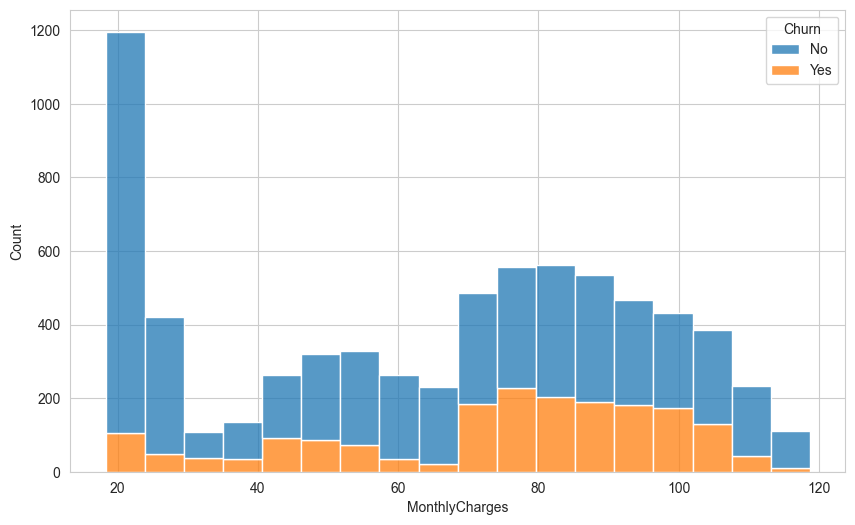

In [162]:
#histplot으로 어떤 구간에서 증감이 일어나는지 확인
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack')
plt.show()

In [163]:
# 여기에 코드를 입력해 주세요.
# 70부근에서 이탈률이  상당히 높아지는 것을 확인할 수 있습니다.
# 40부근에서도 이탈률이 높아지는 것을 확인할 수 있습니다.
# 105부근에서 이탈률이 낮아지는 것을 확인할 수 있습니다.
# 따라서 이 4개의 구간으로 수치형을 범주형으로 변환해 주겠습니다.
df['MonthlyCharges_group'] = pd.cut(df['MonthlyCharges'], bins=[0, 40, 70, 105, 120], labels=['0-39', '40-69', '70-105', '106-120'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_group
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-39
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,40-69
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,40-69
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40-69
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,70-105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,70-105
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,70-105
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-39


F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

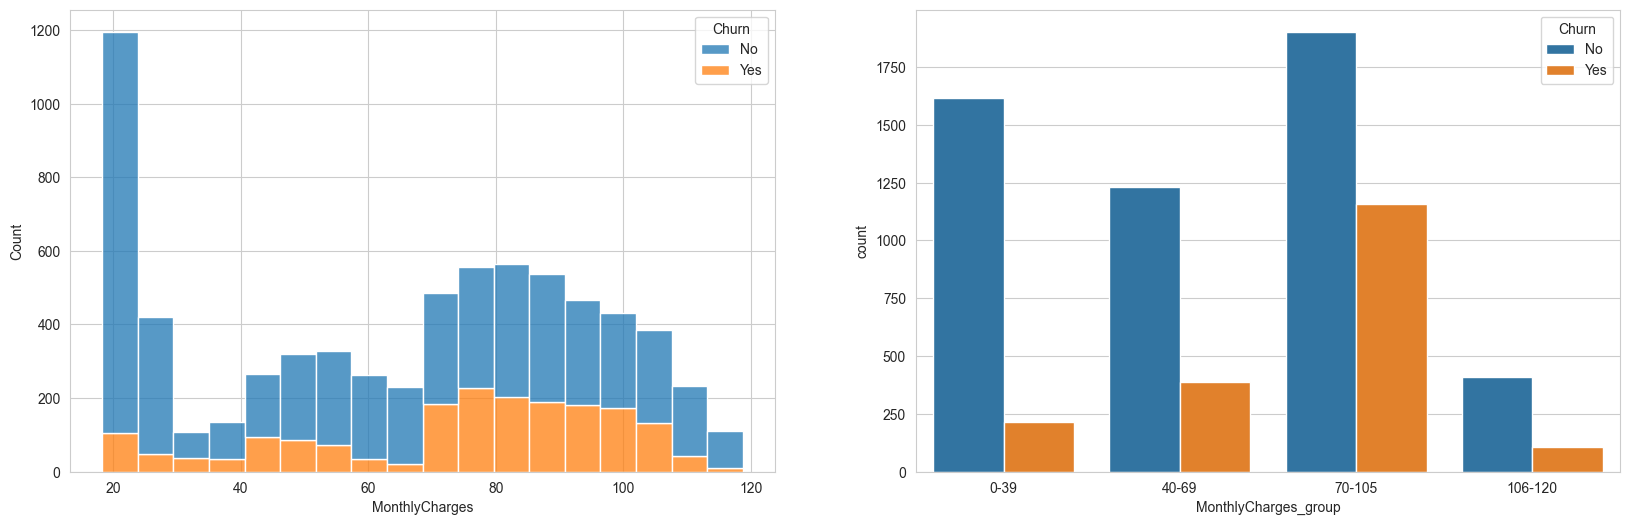

In [165]:
# 여기에 구간화 전의 수치 변수에 대한 히스토그램과 구간화 이후 범주로 변환해준 변수에 대한 countplot을 시각화 해주세요.
# 구간화 이후 이탈률이 높아지는 구간이 3개에서 2개로 줄어든 것을 확인할 수 있습니다.
# 이는 모델이 더 쉽게 학습할 수 있도록 도와줄 것입니다.
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', ax=ax[0])
sns.countplot(data=df, x='MonthlyCharges_group', hue='Churn', ax=ax[1])
plt.show()

In [166]:
# 여기에 구간화 이후의 데이터를 출력해 주세요.
df[['MonthlyCharges', 'MonthlyCharges_group']]

,MonthlyCharges,MonthlyCharges_group
customerID,,
7590-VHVEG,29.85,0-39
5575-GNVDE,56.95,40-69
3668-QPYBK,53.85,40-69
7795-CFOCW,42.30,40-69
9237-HQITU,70.70,70-105
...,...,...
6840-RESVB,84.80,70-105
2234-XADUH,103.20,70-105
4801-JZAZL,29.60,0-39


## 미션 2) - One-Hot-Encoding 하기

* One-Hot Encoding은 범주형 데이터를 머신러닝 모델이 이해할 수 있는 형태로 변환하는 기술 중 하나입니다. One-Hot Encoding을 사용하면 각 범주 간의 거리가 동일하게 유지됩니다. 즉, 범주 간의 유사성을 측정할 때 각 범주가 동일한 거리로 취급되므로 모델이 범주 간의 관계를 더 정확하게 학습할 수 있습니다. One-Hot Encoding은 범주의 수에 따라 적절한 차원을 생성하므로 데이터가 새로운 범주로 확장되거나 변할 때 모델이 쉽게 일반화될 수 있습니다. 각 범주가 독립된 차원으로 표현되므로, 모델의 예측이나 특성 중요도를 해석할 때 각 범주에 대한 기여를 명확하게 파악할 수 있습니다. 라벨 인코딩과 같은 다른 방법들이 범주 간의 임의의 순서를 생성할 수 있는 반면, One-hot encoding은 이러한 문제를 방지하고 모델이 데이터를 오해하는 것을 막습니다. 하지만, One-hot encoding은 범주의 수가 매우 많을 때 차원의 저주(curse of dimensionality)를 초래하거나, 데이터가 희소해질 수 있으므로 적용 시 이러한 점을 고려해야 합니다. 다음의 예시처럼 데이터를 One-Hot-Encoding 해주세요.

<img src="https://i.imgur.com/9Njm4aN.png">

| customerID   |   SeniorCitizen |   tenure |   TotalCharges |   gender_Female |   gender_Male |   Partner_No |   Partner_Yes |   Dependents_No |   Dependents_Yes |   PhoneService_No |
|:-------------|----------------:|---------:|---------------:|----------------:|--------------:|-------------:|--------------:|----------------:|-----------------:|------------------:|
| 7590-VHVEG   |               0 |        1 |          29.85 |               1 |             0 |            0 |             1 |               1 |                0 |                 1 |
| 5575-GNVDE   |               0 |       34 |        1889.5  |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 3668-QPYBK   |               0 |        2 |         108.15 |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 7795-CFOCW   |               0 |       45 |        1840.75 |               0 |             1 |            1 |             0 |               1 |                0 |                 1 |
| 9237-HQITU   |               0 |        2 |         151.65 |               1 |             0 |            1 |             0 |               1 |                0 |                 0 |


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                7032 non-null   object  
 1   SeniorCitizen         7032 non-null   int64   
 2   Partner               7032 non-null   object  
 3   Dependents            7032 non-null   object  
 4   tenure                7032 non-null   int64   
 5   PhoneService          7032 non-null   object  
 6   MultipleLines         7032 non-null   object  
 7   InternetService       7032 non-null   object  
 8   OnlineSecurity        7032 non-null   object  
 9   OnlineBackup          7032 non-null   object  
 10  DeviceProtection      7032 non-null   object  
 11  TechSupport           7032 non-null   object  
 12  StreamingTV           7032 non-null   object  
 13  StreamingMovies       7032 non-null   object  
 14  Contract              7032 non-null   object  

In [168]:
df.columns
feature_names = df.columns[:-2].tolist()
label_names = df.columns[-2]
print(feature_names, label_names)
column_names = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
                 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges','MonthlyCharges_group']
to_encode_names =['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                  'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'] Churn


In [169]:
from sklearn.preprocessing import LabelEncoder
# df['칼럼명'] = label_encoder.fit_transform(df['칼럼명'])
df1 = df.copy()
le = LabelEncoder()
df1 = df1.apply(lambda x: le.fit_transform(x))
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_group
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,1,0,0,2,...,0,0,0,0,1,2,142,74,0,0
5575-GNVDE,1,0,0,0,33,1,0,0,2,0,...,0,0,0,1,0,3,497,3624,0,2
3668-QPYBK,1,0,0,0,1,1,0,0,2,2,...,0,0,0,0,1,3,435,536,1,2
7795-CFOCW,1,0,0,0,44,0,1,0,2,0,...,2,0,0,1,0,0,266,3570,0,2
9237-HQITU,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,1,2,728,674,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,1,0,1,1,23,1,2,0,2,0,...,2,2,2,1,1,3,990,3700,0,3
2234-XADUH,0,0,1,1,71,1,2,1,0,2,...,0,2,2,1,1,1,1339,6304,0,3
4801-JZAZL,0,0,1,1,10,0,1,0,2,0,...,0,0,0,0,1,2,137,1265,0,0


In [170]:

# df[label_names] = pd.factorize(df[label_names])[0]
df1[label_names].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [171]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                7032 non-null   int32
 1   SeniorCitizen         7032 non-null   int64
 2   Partner               7032 non-null   int32
 3   Dependents            7032 non-null   int32
 4   tenure                7032 non-null   int64
 5   PhoneService          7032 non-null   int32
 6   MultipleLines         7032 non-null   int32
 7   InternetService       7032 non-null   int32
 8   OnlineSecurity        7032 non-null   int32
 9   OnlineBackup          7032 non-null   int32
 10  DeviceProtection      7032 non-null   int32
 11  TechSupport           7032 non-null   int32
 12  StreamingTV           7032 non-null   int32
 13  StreamingMovies       7032 non-null   int32
 14  Contract              7032 non-null   int32
 15  PaperlessBilling      7032 non-null   int32
 

In [172]:
# 여기에 one-hot-encoding 을 구현해 주세요.
df_ohe = pd.get_dummies(df,dtype="int64")
column_to_delete = ['Churn_No',	'Churn_Yes']
df_ohe = df_ohe.drop(columns=column_to_delete, axis=1)
df_ohe['MonthlyCharges'] = df['MonthlyCharges'].astype('int64')
df_ohe['TotalCharges'] = df['TotalCharges'].astype('int64')
df_ohe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_group_0-39,MonthlyCharges_group_40-69,MonthlyCharges_group_70-105,MonthlyCharges_group_106-120
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29,29,1,0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
5575-GNVDE,0,34,56,1889,0,1,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
3668-QPYBK,0,2,53,108,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
7795-CFOCW,0,45,42,1840,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
9237-HQITU,0,2,70,151,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,84,1990,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2234-XADUH,0,72,103,7362,1,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4801-JZAZL,0,11,29,346,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0


In [173]:
# # 여기에 one-hot-encoding 을 구현해 주세요.
# df_ohe = pd.get_dummies(df)
# column_to_delete = ['Churn_No',	'Churn_Yes','tenure']
# df_ohe = df_ohe.drop(columns=column_to_delete, axis=1)
# df_ohe

In [174]:

from sklearn.preprocessing import MinMaxScaler
# 숫자데이타의 경우 다른데이타보다 크기때문에 학습의 효율을 위해 정규화를 해주려고 합니다.

scaler = MinMaxScaler()
df_ohe['MonthlyCharges'] = scaler.fit_transform(df_ohe[['MonthlyCharges']])
df_ohe['TotalCharges'] = scaler.fit_transform(df_ohe[['TotalCharges']])
df_ohe['tenure'] = scaler.fit_transform(df_ohe[['tenure']])

# scaler = MinMaxScaler()
# df_ohe['MonthlyCharges'] = scaler.fit_transform(df_ohe[['MonthlyCharges']])
# df_ohe['TotalCharges'] = scaler.fit_transform(df_ohe[['TotalCharges']])
# df_ohe['tenure'] = scaler.fit_transform(df_ohe[['tenure']])

In [175]:
# # 수치형 데이타를 스케일링함
# from sklearn.preprocessing import StandardScaler
# 
# scaler = StandardScaler()
# scaler.fit(df[["MonthlyCharges", "TotalCharges","tenure"]])
# df_ohe[["MonthlyCharges", "TotalCharges","tenure"]] = scaler.transform(df[["MonthlyCharges", "TotalCharges","tenure"]])
# df_ohe[["MonthlyCharges", "TotalCharges","tenure"]]

In [176]:
# # 수치형 데이타를 스케일링함
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(df[["MonthlyCharges", "TotalCharges"]])
# df_ohe[["MonthlyCharges", "TotalCharges"]] = scaler.transform(df[["MonthlyCharges", "TotalCharges"]])
# df_ohe[["MonthlyCharges", "TotalCharges"]]

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                7032 non-null   int32
 1   SeniorCitizen         7032 non-null   int64
 2   Partner               7032 non-null   int32
 3   Dependents            7032 non-null   int32
 4   tenure                7032 non-null   int64
 5   PhoneService          7032 non-null   int32
 6   MultipleLines         7032 non-null   int32
 7   InternetService       7032 non-null   int32
 8   OnlineSecurity        7032 non-null   int32
 9   OnlineBackup          7032 non-null   int32
 10  DeviceProtection      7032 non-null   int32
 11  TechSupport           7032 non-null   int32
 12  StreamingTV           7032 non-null   int32
 13  StreamingMovies       7032 non-null   int32
 14  Contract              7032 non-null   int32
 15  PaperlessBilling      7032 non-null   int32
 

## 미션 3) - 여러 피처 엔지니어링 기법을 적용하고 통신사 고객 이탈여부에 대한 모델의 성능을 Accuracy로 평가해 주세요.

* 이 미션은 데이터 전처리와 피처 엔지니어링의 중요성을 이해하고, 실제 비즈니스 문제에 적용할 수 있는 머신러닝 모델을 개발하는 데 중점을 둡니다. 통신사 고객 데이터를 활용하여 고객의 이탈 여부를 예측하는 머신러닝 모델을 개발하고, 여러 피처 엔지니어링 기법을 적용하여 모델의 정확도(Accuracy)를 높여보세요. 고객 이탈 여부 예측은 통신사에 있어 중요한 비즈니스 문제로, 고객 유지 전략 수립에 큰 영향을 미칩니다.

* 피처엔지니어링을 진행하고 모델의 성능을 평가합니다.
* 모델은 트리계열 모델 외 다른 모델을 사용해도 됩니다.


In [205]:
import tensorflow as tf
inputs = {
    'gender': tf.keras.Input(shape=(), dtype='int32'),
    'SeniorCitizen': tf.keras.Input(shape=(), dtype='int64'),
    'Partner': tf.keras.Input(shape=(), dtype='int32'),
    'Dependents': tf.keras.Input(shape=(), dtype='int32'),
    'PhoneService': tf.keras.Input(shape=(), dtype='int32'),
    'MultipleLines': tf.keras.Input(shape=(), dtype='int32'),
    'InternetService': tf.keras.Input(shape=(), dtype='int32'),
    'OnlineSecurity': tf.keras.Input(shape=(), dtype='int32'),
    'OnlineBackup': tf.keras.Input(shape=(), dtype='int32'),
    'DeviceProtection': tf.keras.Input(shape=(), dtype='int32'),
    'TechSupport': tf.keras.Input(shape=(), dtype='int32'),
    'StreamingTV': tf.keras.Input(shape=(), dtype='int32'),
    'StreamingMovies': tf.keras.Input(shape=(), dtype='int32'),
    'Contract': tf.keras.Input(shape=(), dtype='int32'),
    'PaperlessBilling': tf.keras.Input(shape=(), dtype='int32'),
    'PaymentMethod': tf.keras.Input(shape=(), dtype='int32'),
    'MonthlyCharges_group': tf.keras.Input(shape=(), dtype='int32'),
    
    'MonthlyCharges': tf.keras.Input(shape=(), dtype='int64'),
    'TotalCharges': tf.keras.Input(shape=(), dtype='int64'), 
    'tenure': tf.keras.Input(shape=(), dtype='int64'),
  

}

# x = tf.keras.layers.concatenate(list(inputs.values()))
# Normalize the numeric inputs; e.g. [2.0] -> [0.0].
gender_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['gender'])
gender_output = tf.keras.layers.Reshape([-1])(gender_output)
gender_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(gender_output)
gender_output =tf.keras.layers.BatchNormalization()(gender_output)
gender_output =tf.keras.layers.Activation('relu')(gender_output)
gender_output =tf.keras.layers.Dropout(0.5)(gender_output)

SeniorCitizen_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['SeniorCitizen'])
SeniorCitizen_output = tf.keras.layers.Reshape([-1])(SeniorCitizen_output)
SeniorCitizen_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(SeniorCitizen_output)
SeniorCitizen_output =tf.keras.layers.BatchNormalization()(SeniorCitizen_output)
SeniorCitizen_output =tf.keras.layers.Activation('relu')(SeniorCitizen_output)
SeniorCitizen_output =tf.keras.layers.Dropout(0.5)(SeniorCitizen_output)

Partner_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['Partner'])
Partner_output = tf.keras.layers.Reshape([-1])(Partner_output)
Partner_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(Partner_output)
Partner_output =tf.keras.layers.BatchNormalization()(Partner_output)
Partner_output =tf.keras.layers.Activation('relu')(Partner_output)
Partner_output =tf.keras.layers.Dropout(0.5)(Partner_output)

Dependents_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['Dependents'])
Dependents_output = tf.keras.layers.Reshape([-1])(Dependents_output)
Dependents_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(Dependents_output)
Dependents_output =tf.keras.layers.BatchNormalization()(Dependents_output)
Dependents_output =tf.keras.layers.Activation('relu')(Dependents_output)
Dependents_output =tf.keras.layers.Dropout(0.5)(Dependents_output)

PhoneService_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['PhoneService'])
PhoneService_output = tf.keras.layers.Reshape([-1])(PhoneService_output)

PhoneService_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(PhoneService_output)
PhoneService_output =tf.keras.layers.BatchNormalization()(PhoneService_output)
PhoneService_output =tf.keras.layers.Activation('relu')(PhoneService_output)
PhoneService_output =tf.keras.layers.Dropout(0.5)(PhoneService_output)

MultipleLines_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['MultipleLines'])
MultipleLines_output = tf.keras.layers.Reshape([-1])(MultipleLines_output)

MultipleLines_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(MultipleLines_output)
MultipleLines_output =tf.keras.layers.BatchNormalization()(MultipleLines_output)
MultipleLines_output =tf.keras.layers.Activation('relu')(MultipleLines_output)
MultipleLines_output =tf.keras.layers.Dropout(0.5)(MultipleLines_output)

InternetService_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['InternetService'])
InternetService_output = tf.keras.layers.Reshape([-1])(InternetService_output)

InternetService_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(InternetService_output)
InternetService_output =tf.keras.layers.BatchNormalization()(InternetService_output)
InternetService_output =tf.keras.layers.Activation('relu')(InternetService_output)
InternetService_output =tf.keras.layers.Dropout(0.5)(InternetService_output)

OnlineSecurity_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['OnlineSecurity'])
OnlineSecurity_output = tf.keras.layers.Reshape([-1])(OnlineSecurity_output)

OnlineSecurity_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(OnlineSecurity_output)
OnlineSecurity_output =tf.keras.layers.BatchNormalization()(OnlineSecurity_output)
OnlineSecurity_output =tf.keras.layers.Activation('relu')(OnlineSecurity_output)
OnlineSecurity_output =tf.keras.layers.Dropout(0.5)(OnlineSecurity_output)

OnlineBackup_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['OnlineBackup'])
OnlineBackup_output = tf.keras.layers.Reshape([-1])(OnlineBackup_output)

OnlineBackup_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(OnlineBackup_output)
OnlineBackup_output =tf.keras.layers.BatchNormalization()(OnlineBackup_output)
OnlineBackup_output =tf.keras.layers.Activation('relu')(OnlineBackup_output)
OnlineBackup_output =tf.keras.layers.Dropout(0.5)(OnlineBackup_output)

DeviceProtection_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['DeviceProtection'])
DeviceProtection_output = tf.keras.layers.Reshape([-1])(DeviceProtection_output)

DeviceProtection_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(DeviceProtection_output)
DeviceProtection_output =tf.keras.layers.BatchNormalization()(DeviceProtection_output)
DeviceProtection_output =tf.keras.layers.Activation('relu')(DeviceProtection_output)
DeviceProtection_output =tf.keras.layers.Dropout(0.5)(DeviceProtection_output)

TechSupport_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['TechSupport'])
TechSupport_output = tf.keras.layers.Reshape([-1])(TechSupport_output)

TechSupport_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(TechSupport_output)
TechSupport_output =tf.keras.layers.BatchNormalization()(TechSupport_output)
TechSupport_output =tf.keras.layers.Activation('relu')(TechSupport_output)
TechSupport_output =tf.keras.layers.Dropout(0.5)(TechSupport_output)

StreamingTV_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['StreamingTV'])
StreamingTV_output = tf.keras.layers.Reshape([-1])(StreamingTV_output)
StreamingTV_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(StreamingTV_output)
StreamingTV_output =tf.keras.layers.BatchNormalization()(StreamingTV_output)
StreamingTV_output =tf.keras.layers.Activation('relu')(StreamingTV_output)
StreamingTV_output =tf.keras.layers.Dropout(0.5)(StreamingTV_output)

StreamingMovies_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['StreamingMovies'])
StreamingMovies_output = tf.keras.layers.Reshape([-1])(StreamingMovies_output)
StreamingMovies_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(StreamingMovies_output)
StreamingMovies_output =tf.keras.layers.BatchNormalization()(StreamingMovies_output)
StreamingMovies_output =tf.keras.layers.Activation('relu')(StreamingMovies_output)
StreamingMovies_output =tf.keras.layers.Dropout(0.5)(StreamingMovies_output)

Contract_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['Contract'])
Contract_output = tf.keras.layers.Reshape([-1])(Contract_output)
Contract_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(Contract_output)
Contract_output =tf.keras.layers.BatchNormalization()(Contract_output)
Contract_output =tf.keras.layers.Activation('relu')(Contract_output)
Contract_output =tf.keras.layers.Dropout(0.5)(Contract_output)

PaperlessBilling_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['PaperlessBilling'])
PaperlessBilling_output = tf.keras.layers.Reshape([-1])(PaperlessBilling_output)
PaperlessBilling_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(PaperlessBilling_output)
PaperlessBilling_output =tf.keras.layers.BatchNormalization()(PaperlessBilling_output)
PaperlessBilling_output =tf.keras.layers.Activation('relu')(PaperlessBilling_output)
PaperlessBilling_output =tf.keras.layers.Dropout(0.5)(PaperlessBilling_output)

PaymentMethod_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['PaymentMethod'])
PaymentMethod_output = tf.keras.layers.Reshape([-1])(PaymentMethod_output)
PaymentMethod_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(PaymentMethod_output)
PaymentMethod_output =tf.keras.layers.BatchNormalization()(PaymentMethod_output)
PaymentMethod_output =tf.keras.layers.Activation('relu')(PaymentMethod_output)
PaymentMethod_output =tf.keras.layers.Dropout(0.5)(PaymentMethod_output)

MonthlyCharges_group_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['MonthlyCharges_group'])
MonthlyCharges_group_output = tf.keras.layers.Reshape([-1])(MonthlyCharges_group_output)
MonthlyCharges_group_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(MonthlyCharges_group_output)
MonthlyCharges_group_output =tf.keras.layers.BatchNormalization()(MonthlyCharges_group_output)
MonthlyCharges_group_output =tf.keras.layers.Activation('relu')(MonthlyCharges_group_output)
MonthlyCharges_group_output =tf.keras.layers.Dropout(0.5)(MonthlyCharges_group_output)

MonthlyCharges_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['MonthlyCharges'])
MonthlyCharges_output = tf.keras.layers.Reshape([-1])(MonthlyCharges_output)
MonthlyCharges_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(MonthlyCharges_output)
MonthlyCharges_output =tf.keras.layers.BatchNormalization()(MonthlyCharges_output)
MonthlyCharges_output =tf.keras.layers.Activation('relu')(MonthlyCharges_output)
MonthlyCharges_output =tf.keras.layers.Dropout(0.5)(MonthlyCharges_output)

TotalCharges_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['TotalCharges'])
TotalCharges_output = tf.keras.layers.Reshape([-1])(TotalCharges_output)
TotalCharges_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(TotalCharges_output)
TotalCharges_output =tf.keras.layers.BatchNormalization()(TotalCharges_output)
TotalCharges_output =tf.keras.layers.Activation('relu')(TotalCharges_output)
TotalCharges_output =tf.keras.layers.Dropout(0.5)(TotalCharges_output)

tenure_output = tf.keras.layers.Normalization(
    axis=None, mean=1.0, variance=1.0)(inputs['tenure'])
tenure_output = tf.keras.layers.Reshape([-1])(tenure_output)
tenure_output = tf.keras.layers.Dense(2,kernel_initializer = 'he_normal')(tenure_output)
tenure_output =tf.keras.layers.BatchNormalization()(tenure_output)
tenure_output =tf.keras.layers.Activation('relu')(tenure_output)
tenure_output =tf.keras.layers.Dropout(0.5)(tenure_output)


x =tf.concat([gender_output, SeniorCitizen_output, Partner_output, Dependents_output, PhoneService_output,
                  MultipleLines_output, InternetService_output, OnlineSecurity_output, OnlineBackup_output,
                  DeviceProtection_output, TechSupport_output, StreamingTV_output, StreamingMovies_output, Contract_output, PaperlessBilling_output, PaymentMethod_output,MonthlyCharges_group_output,MonthlyCharges_output,TotalCharges_output,tenure_output], -1)
x = tf.keras.layers.Dense(64,kernel_initializer = 'he_normal')(x)
x =tf.keras.layers.BatchNormalization()(x)
x =tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(4,kernel_initializer = 'he_normal')(x)
x =tf.keras.layers.BatchNormalization()(x)
x =tf.keras.layers.Activation('relu')(x)

outputs = tf.keras.layers.Dense(1)(x)
preprocessing_model = tf.keras.Model(inputs, outputs)

In [206]:
preprocessing_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_181 (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 input_182 (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 input_183 (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 input_184 (InputLayer)         [(None,)]            0           []                               
                                                                                            

In [207]:
# X = df_ohe
# y = df["Churn"]
X = df1[feature_names]
y = df1[label_names]
# X.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)
print(X.shape, y.shape)
y.head()

(7032, 19) (7032,)


customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
Name: Churn, dtype: int32

In [208]:
train_df, test_df = train_test_split(df1, test_size=0.2, random_state=42)

# 결과 확인
print("훈련셋 크기:", train_df.shape)
print("테스트셋 크기:", test_df.shape)

훈련셋 크기: (5625, 21)
테스트셋 크기: (1407, 21)


In [209]:
test_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_group
customerID,,,,,,,,,,,,,,,,,,,,,
6614-YWYSC,1,1,1,0,60,1,2,2,1,1,...,1,1,1,2,0,0,92,3208,0,0
9546-KDTRB,0,0,0,0,18,1,2,2,1,1,...,1,1,1,0,0,0,86,1527,0,0
0871-URUWO,1,0,1,0,12,1,2,1,0,0,...,0,2,2,0,1,1,1322,3003,1,3
5151-HQRDG,1,0,1,0,36,1,2,0,2,0,...,0,0,0,0,1,3,459,3737,0,2
6624-JDRDS,0,0,0,0,5,0,1,0,2,0,...,0,0,0,0,0,0,135,716,0,0


In [210]:
batch_size = 32

def df_to_dataset(dataframe, label_name="Churn", shuffle=True, batch_size=batch_size):
    dataframe = dataframe.copy()
    labels = dataframe.pop(label_name)
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
        ds = ds.repeat()
    ds = ds.batch(batch_size)

    return ds

In [211]:
#훈련셋, 테스트셋 나눔
# from sklearn.model_selection import train_test_split
# 
# X_train, X_test, y_train, y_test = train_test_split(
# #     X, y, test_size=0.2, stratify=y, random_state=2)
# 
# from sklearn.preprocessing import LabelEncoder
# 
# # LabelEncoder 객체 생성
# label_encoder = LabelEncoder()
# 
# # 'Yes'를 1, 'No'를 0으로 변환
# y_train = label_encoder.fit_transform(y_train)
# y_test = label_encoder.fit_transform(y_test)
# print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

In [212]:
test_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_group
customerID,,,,,,,,,,,,,,,,,,,,,
6614-YWYSC,1,1,1,0,60,1,2,2,1,1,...,1,1,1,2,0,0,92,3208,0,0
9546-KDTRB,0,0,0,0,18,1,2,2,1,1,...,1,1,1,0,0,0,86,1527,0,0
0871-URUWO,1,0,1,0,12,1,2,1,0,0,...,0,2,2,0,1,1,1322,3003,1,3
5151-HQRDG,1,0,1,0,36,1,2,0,2,0,...,0,0,0,0,1,3,459,3737,0,2
6624-JDRDS,0,0,0,0,5,0,1,0,2,0,...,0,0,0,0,0,0,135,716,0,0


In [213]:
train_ds = df_to_dataset(train_df)
train_ds
test_ds = df_to_dataset(test_df, shuffle=False)
test_ds

<BatchDataset element_spec=({'gender': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'SeniorCitizen': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Partner': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'Dependents': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'tenure': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'PhoneService': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'MultipleLines': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'InternetService': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'OnlineSecurity': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'OnlineBackup': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'DeviceProtection': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'TechSupport': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'StreamingTV': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'StreamingMovies': TensorSpec(shape=(None,), dtype=tf.int32, name=None)

In [214]:
import os
from os.path import isdir, join
use_colab = True
assert use_colab in [True, False]
if use_colab:
    checkpoint_dir ='./drive/MyDrive/train_ckpt/spectrogram/exp1'
    if not os.path.isdir(checkpoint_dir):
        os.makedirs(checkpoint_dir)
else:
    checkpoint_dir = 'spectrogram/exp1'

In [215]:
# import numpy as np
# from sklearn.decomposition import PCA


# # PCA 모델 생성
# pca = PCA(n_components=5)  # 주성분을 2개로 설정

# # PCA 모델 학습 및 변환
# X_pca = pca.fit_transform(X)

# # 변환된 데이터 확인
# print("Original shape:", X.shape)
# print("Transformed shape:", X_pca.shape)


In [216]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     monitor='val_loss',
                                                     restore_best_weights=True,

                                                     verbose=1)
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # 관찰할 지표
                              factor=0.2,  # 학습률을 줄이는 비율
                              patience=4,  # 몇 번의 에포크 동안 감소하지 않아야 하는지
                              min_lr=1e-9)
preprocessing_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                            metrics=['accuracy'])

In [217]:
test_ds

<BatchDataset element_spec=({'gender': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'SeniorCitizen': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Partner': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'Dependents': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'tenure': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'PhoneService': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'MultipleLines': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'InternetService': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'OnlineSecurity': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'OnlineBackup': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'DeviceProtection': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'TechSupport': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'StreamingTV': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'StreamingMovies': TensorSpec(shape=(None,), dtype=tf.int32, name=None)

In [218]:
max_epochs = 150

history = preprocessing_model.fit(train_ds,
                                  epochs=max_epochs,
                                  steps_per_epoch=train_df.shape[0] // batch_size,
                                  callbacks=[cp_callback,early_stopping_cb,reduce_lr],
                                  validation_data=test_ds,
                                  validation_steps=test_df.shape[0]// batch_size)

Epoch 1/150
173/175 [============================>.] - ETA: 0s - loss: 0.7257 - accuracy: 0.6472
Epoch 1: val_loss improved from inf to 0.56962, saving model to ./drive/MyDrive/train_ckpt/spectrogram\exp1
175/175 [==============================] - 10s 30ms/step - loss: 0.7242 - accuracy: 0.6484 - val_loss: 0.5696 - val_accuracy: 0.7427 - lr: 0.0010
Epoch 2/150
173/175 [============================>.] - ETA: 0s - loss: 0.5736 - accuracy: 0.7401
Epoch 2: val_loss improved from 0.56962 to 0.51591, saving model to ./drive/MyDrive/train_ckpt/spectrogram\exp1
175/175 [==============================] - 5s 26ms/step - loss: 0.5729 - accuracy: 0.7395 - val_loss: 0.5159 - val_accuracy: 0.7340 - lr: 0.0010
Epoch 3/150
174/175 [============================>.] - ETA: 0s - loss: 0.5143 - accuracy: 0.7466
Epoch 3: val_loss improved from 0.51591 to 0.48374, saving model to ./drive/MyDrive/train_ckpt/spectrogram\exp1
175/175 [==============================] - 5s 26ms/step - loss: 0.5142 - accuracy: 0.7

In [28]:
#XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(random_state=0,
                      use_label_encoder=False,
                      eval_metric='logloss',
                      booster='gbtree',
                      objective='binary:logistic',
                      max_depth=5,
                      learning_rate=0.05,
                      n_estimators=500,
                      subsample=1,
                      colsample_bytree=1,
                      n_jobs=-1,

                      # booster (기본값 gbtree) : 부스팅 알고리즘 (또는 dart, gblinear)
                      # objective (기본값 binary:logistic) : 이진분류 (다중분류: multi:softmax)
                      # max_depth (기본값 6) : 최대 한도 깊이
                      # learning_rate (기본값 0.1) : 학습률
                      # n_estimators (기본값 100) : 트리의 수
                      # subsample (기본값 1) : 훈련 샘플 개수의 비율
                      # colsample_bytree (기본값 1) : 특성 개수의 비율
                      # n_jobs (기본값 1) : 사용 코어 수 (-1: 모든 코어를 다 사용)
                      )
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7953091684434968

In [29]:
# 의사결정나무 하이퍼 파라미터
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1,
                               min_samples_split=5, random_state=0)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(y_predict[:5])
accuracy_score(y_test, y_predict)

[0 1 0 0 0]


0.7846481876332623

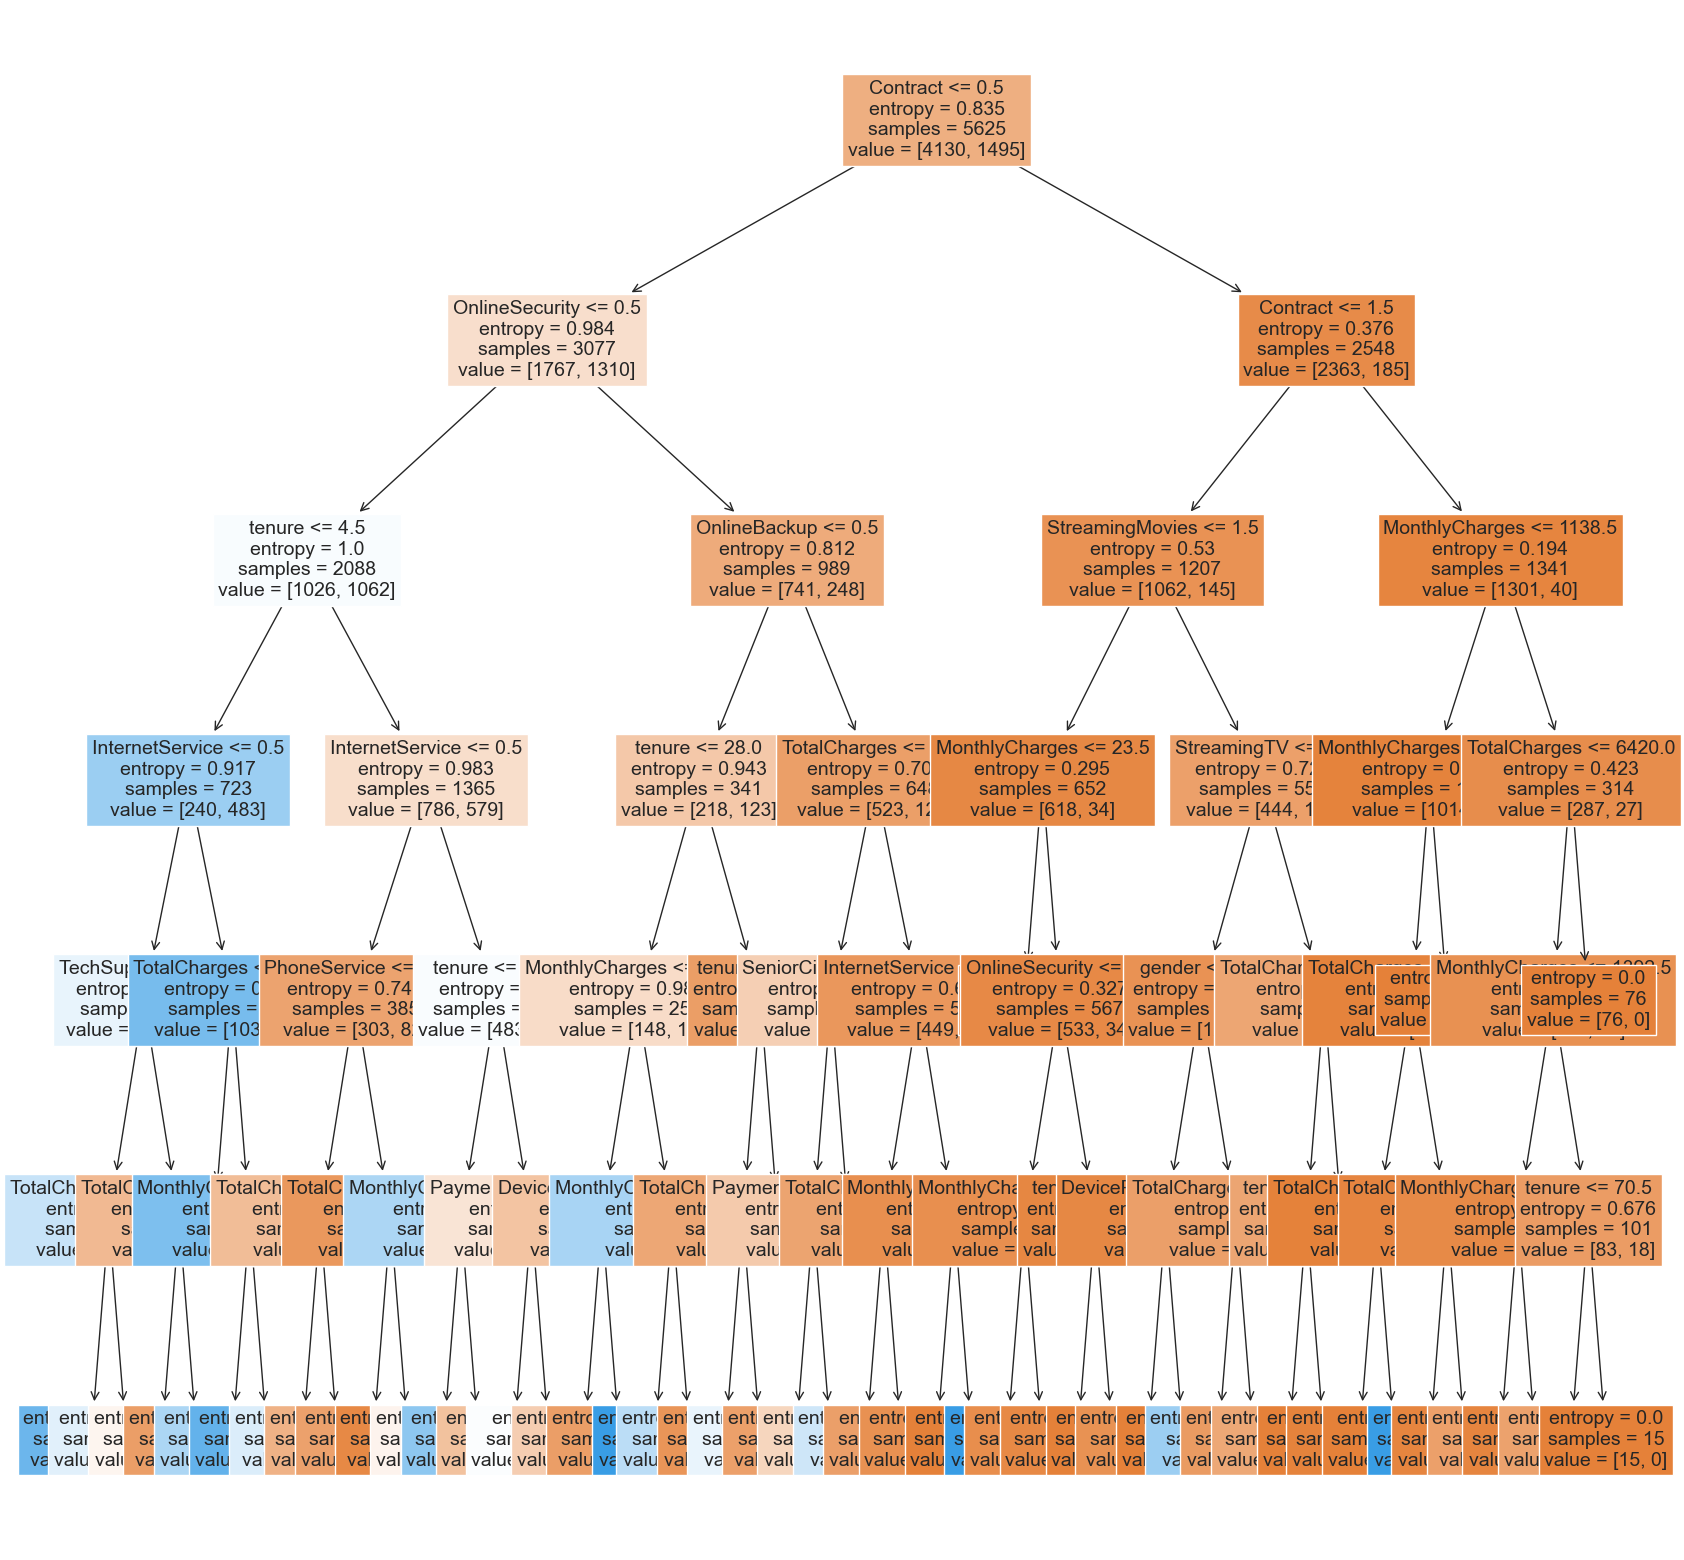

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=14)

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categoric

<Axes: >

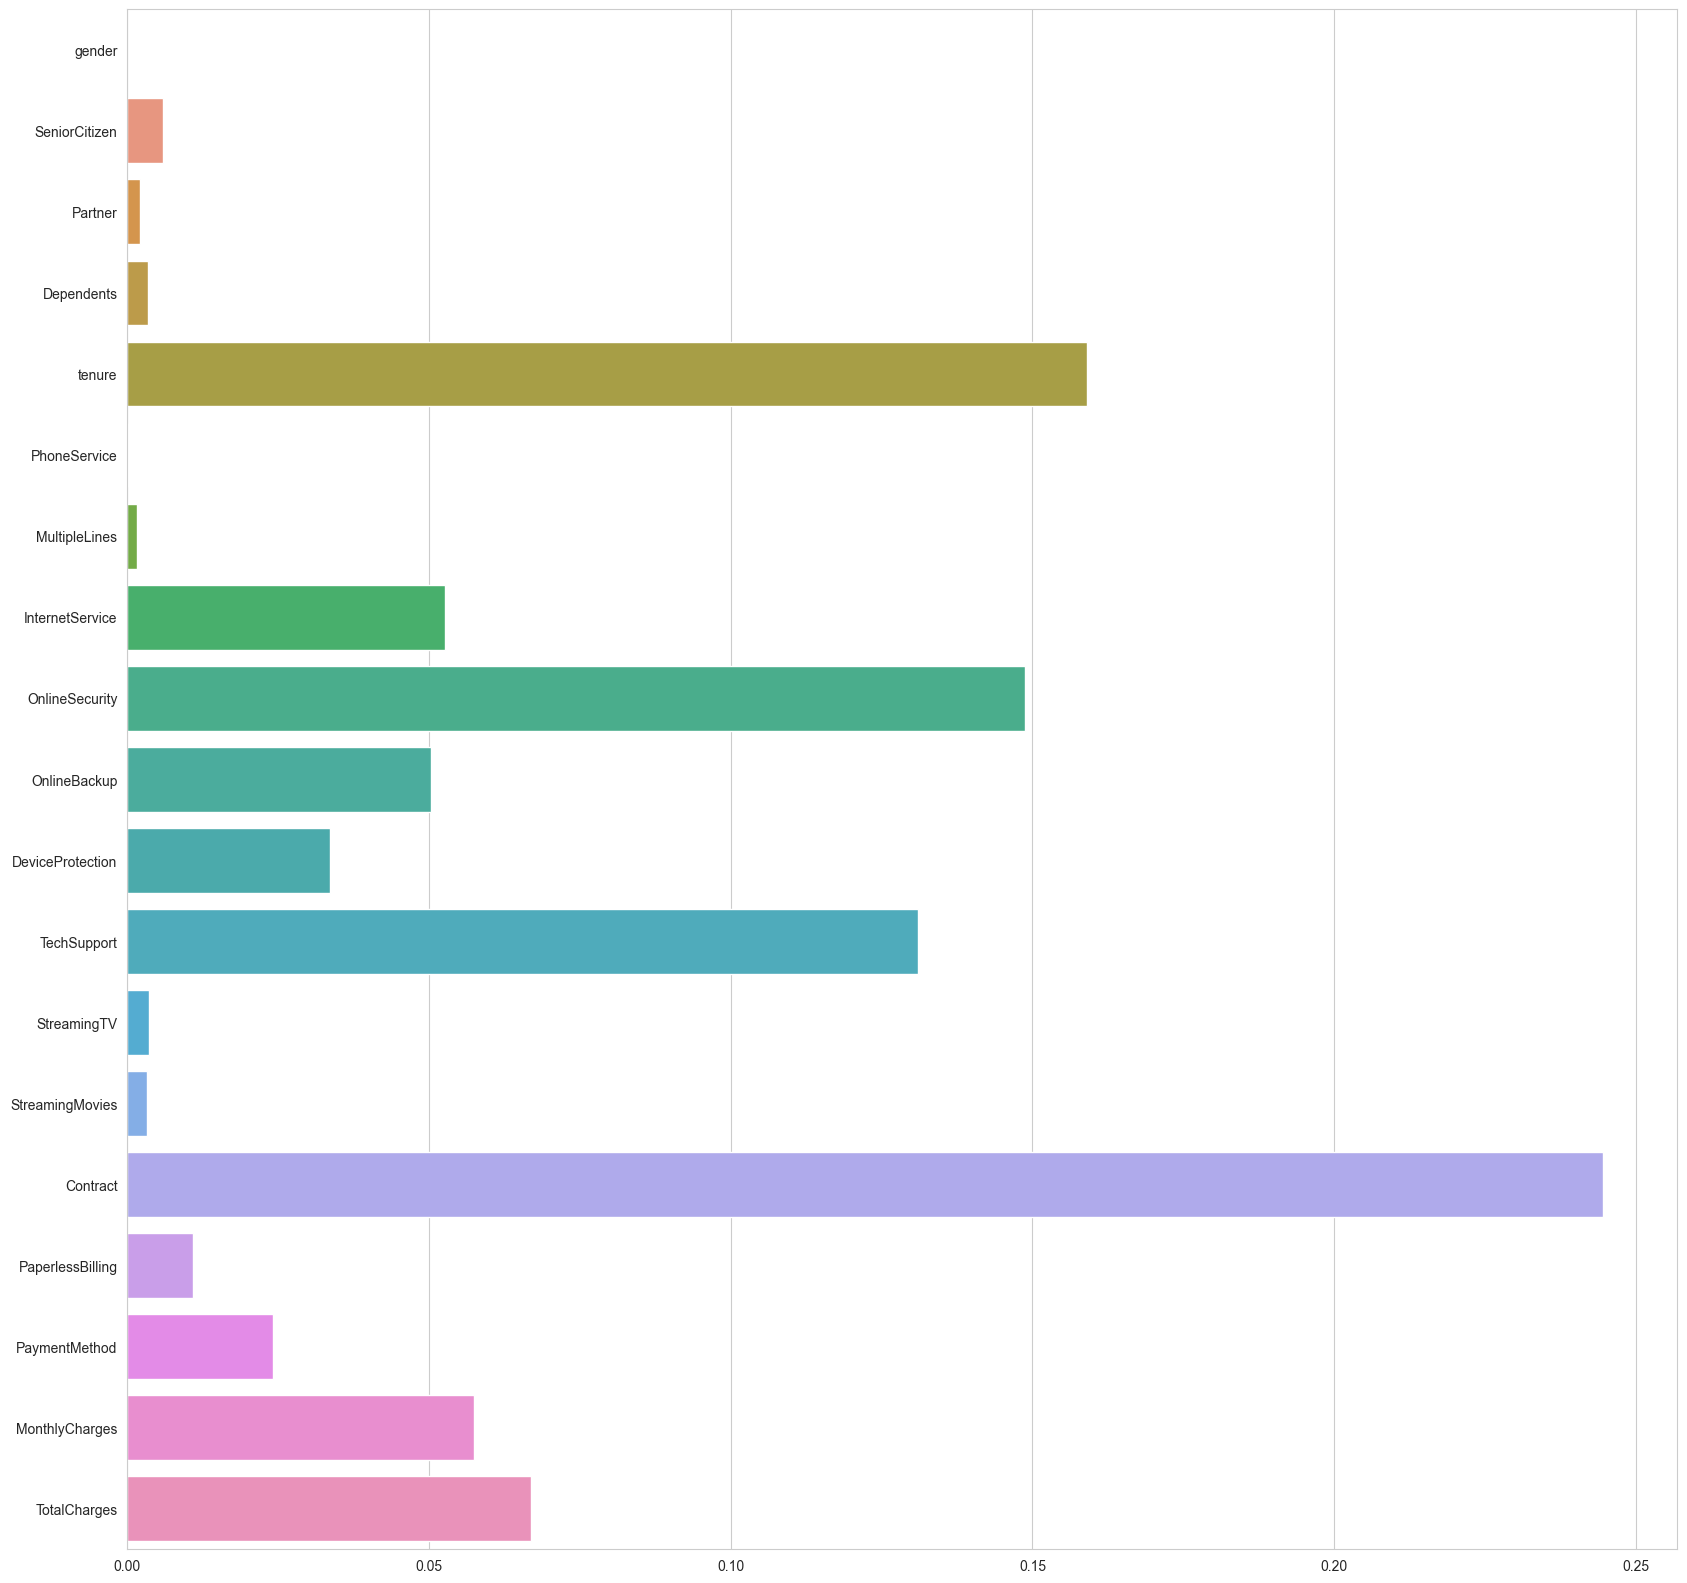

In [31]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(20,20))
model = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=0)
model.fit(X_train, y_train)
sns.barplot(x=model.feature_importances_, y=feature_names)

In [32]:
# xgboost
from xgboost import XGBClassifier
model = XGBClassifier(random_state=24)
model.fit(X_train, y_train)
# 위에서 만든 모델로 학습과 예측을 진행해 주세요.
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [33]:
# 학습 결과와 원래 정답과의 Accuracy(정확도)를 구해주세요.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

78.82018479033405